We'll first Import the necessary modules.

In [1]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly 
import plotly.express as px

% matplotlib inline

After mounting google drive, We have opened the *dataset* in a pandas dataframe

---



In [2]:
df = pd.read_csv("/content/drive/MyDrive/Spotify.csv", encoding='latin-1')
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",MÃ¥neskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

Now we will look for null values in our dataset

In [4]:
#Check missing values
df.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

There are no null values in the dataset, these 0's are not null values the standard representation of nullvalues is NaN

Now we will find the number of times charted by an artist, using pandas and then visualize by arranging the sum for an artist in decending order

In [5]:
#number of times charted by artist

df_numbercharted=df.groupby('Artist').sum().sort_values('Number of Times Charted', ascending=False)
df_numbercharted=df_numbercharted.reset_index()
df_numbercharted

,Artist,Index,Highest Charting Position,Number of Times Charted
0,Billie Eilish,13908,1136,432
1,Juice WRLD,25342,1755,431
2,Harry Styles,1990,139,364
3,Ed Sheeran,4440,657,314
4,Pop Smoke,17702,2420,308
...,...,...,...,...
711,"KALIM, Ufo361",1143,183,1
712,"Kane Brown, blackbear",231,187,1
713,Kehlani,1191,177,1
714,"Kygo, Donna Summer",897,194,1


We will take input from user about how many top artist's data they want to see

In [9]:
x=int(input("Enter the No. of Top Artists : "))
px.bar(x='Artist', y='Number of Times Charted', data_frame=df_numbercharted.head(x), title="Top {} Artists with Highes Number of Times Charted".format(x))

Enter the No. of Top Artists : 50


In [10]:
x=int(input("Enter the No. of Top Artists : "))
px.bar(x='Artist', y='Number of Times Charted', data_frame=df_numbercharted.head(x), title="Top {} Artists with Highes Number of Times Charted".format(x))

Enter the No. of Top Artists : 10


**Data Cleaning**
Now we will clean our data and then we will try to find correlation between the columns.

In [11]:
#clean data first
df=df.fillna('')
df=df.replace(' ', '')
df['Streams']=df['Streams'].str.replace(',','')
#convet all numeric columns to numeric
df[['Highest Charting Position', 'Number of Times Charted', 'Streams', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       ]] = df[['Highest Charting Position', 'Number of Times Charted', 'Streams','Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       ]].apply(pd.to_numeric)

Now we will seperate year from the column **Release Date** so that we can plot a heatmap

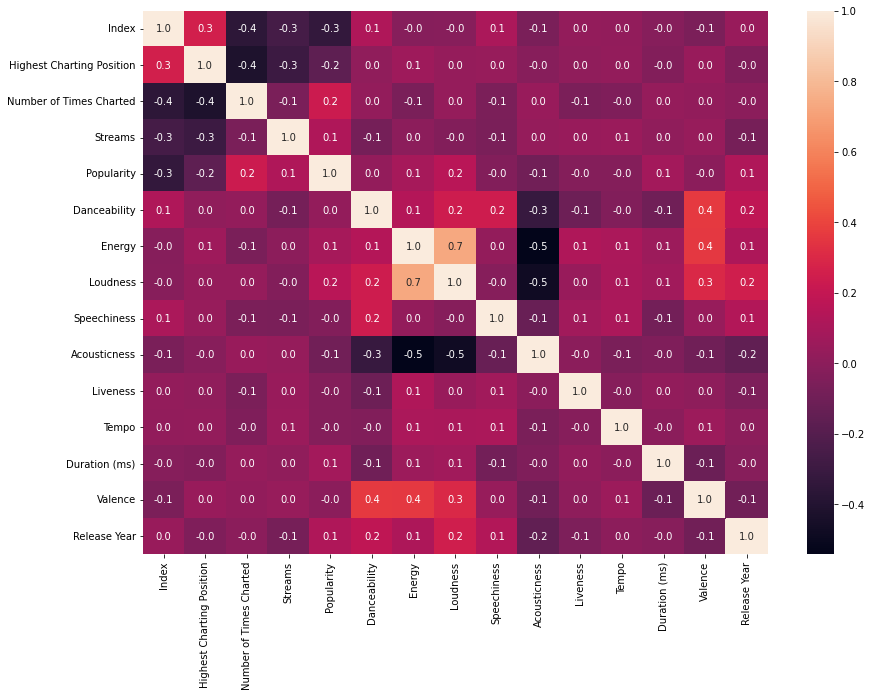

In [12]:
df['Release Year'] = pd.DatetimeIndex(df['Release Date']).year
%matplotlib inline

f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

We will now see how the parameter **Energy** of songs changed over the year

In [22]:
px.line(x='Release Year', y='Energy', data_frame=df, title="Energy over the course of the Year")

We will now see how the parameter **Loudness** of songs changed over the year

In [23]:
px.line(x='Release Year', y='Loudness', data_frame=df, title="Loudness over the course of the Year")

We will now see how a song charted over no. of years, by first grouping data by *release year* and then sum of *number of times charted* 

In [15]:
dfyear = df.groupby('Release Year').sum().sort_values('Number of Times Charted', ascending=False)
dfyear=dfyear.reset_index()
px.bar(x='Release Year', y='Number of Times Charted', data_frame=dfyear.head(7))

Now we will find the most popular artists

In [16]:
x=int(input("Enter the No. of artists : "))
artistbypop = df.groupby('Artist').sum().sort_values('Popularity' ,ascending=False)[:x]
artistbypop=artistbypop.reset_index()
#plot the graph
px.bar(x='Artist', y='Popularity', data_frame=artistbypop)

Enter the No. of artists : 10


Now we will plot a table and then a pie chart for the most popular genres

In [17]:
#most popular geners

df['Genre']=df['Genre'].astype(str)
df["Genre"][df["Genre"] == "[]"] = np.nan
df["Genre"] = df["Genre"].fillna(0)
#here we get rid of useless symbols to be able to separate genres
df.Genre=df.Genre.str.replace("[", "")
df.Genre=df.Genre.str.replace("]", "")
df.Genre=df.Genre.str.replace("'", "")
#now we devide genre strings by comma
df["Genre"] = df["Genre"].str.split(",")
#next command separates rows based on genres, so for each song that is marked with several genres, 
#now we'll have multiple rows with one genre for each row
df=df.explode('Genre')

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Release Year
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,MÃ¥neskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,2017.0
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,MÃ¥neskin,3377762,3Wrjm47oTz2sjIgck11l5e,italian pop,...,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,2017.0
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,2021.0
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,2021.0
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,post-teen pop,...,0.523,-4.333,0.0300,0.1840,0.1320,104.988,217307.0,0.394,D,2018.0
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"DadÃ¡ BoladÃ£o, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,brega funk,...,0.550,-7.026,0.0587,0.2490,0.1820,154.064,152784.0,0.881,F,2019.0
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"DadÃ¡ BoladÃ£o, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,funk carioca,...,0.550,-7.026,0.0587,0.2490,0.1820,154.064,152784.0,0.881,F,2019.0
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],4595450,Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,pop,...,0.603,-7.176,0.0640,0.4330,0.0862,205.272,221307.0,0.422,G,2019.0


Enter the no. of genres : 30


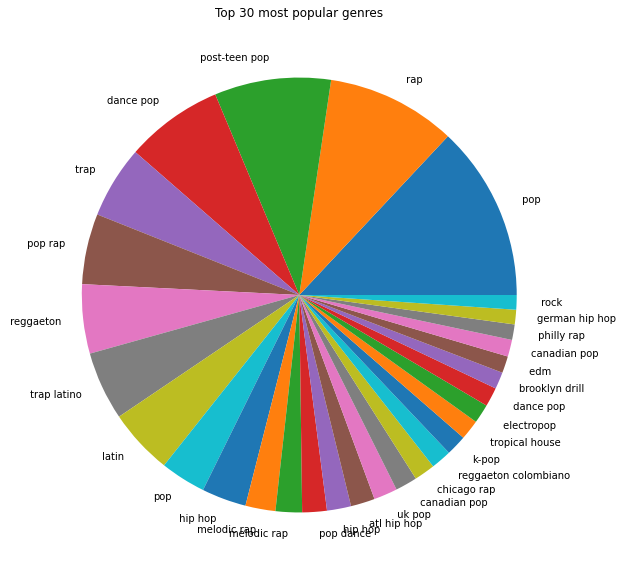

In [19]:
x=int(input("Enter the no. of genres : "))
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df.Genre.value_counts()[:x].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top {} most popular genres".format(x))
plt.show()

Enter the no. of genres : 10


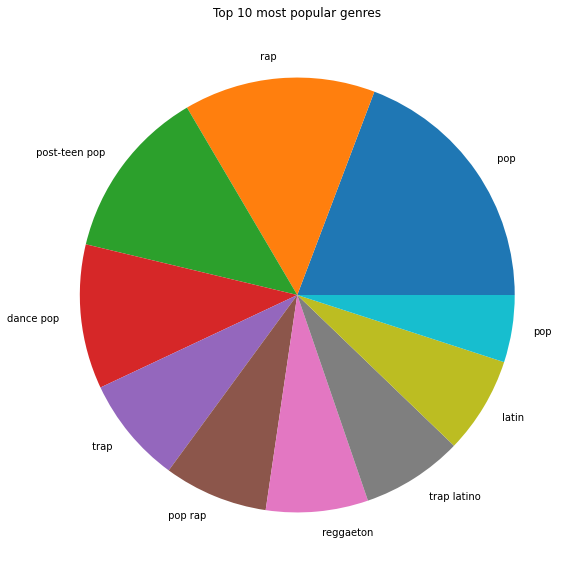

In [20]:
x=int(input("Enter the no. of genres : "))
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df.Genre.value_counts()[:x].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top {} most popular genres".format(x))
plt.show()